<a href="https://colab.research.google.com/github/carascott/skills-introduction-to-github/blob/main/CSVandPandasHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd

acc =  pd.read_csv('/content/acc_players-2324F.csv')

In [17]:
#1
headers = acc.iloc[0]
acc = acc[1:]
acc.columns = headers
acc.head()

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
1,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
2,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
4,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2
5,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9


In [18]:
#2
total_points = acc['PTS'].astype(int).sum()
print(f"Total points scored by all players: {total_points}")

Total points scored by all players: 38411


In [20]:
maxMP = acc['MP'].astype(int).max()
print(f"Maximum minutes played by a player: {maxMP}")

Maximum minutes played by a player: 1333


In [22]:
acc['TRB'] = acc['TRB'].astype(int)
TRB = acc.sort_values('TRB', ascending=False)
TRB5 = TRB.head(5)

print("Top 5 players in terms of total rebounds:")
print(TRB5[['Player', 'TRB']])

Top 5 players in terms of total rebounds:
0             Player  TRB
6      Armando Bacot  380
179  Ian Schieffelin  340
91   Harrison Ingram  327
45    Mohamed Diarra  311
150    Norchad Omier  309


In [24]:
# 3
acc['MP'] = acc['MP'].astype(int)
min500plus = acc[acc['MP'] > 500]
print(min500plus)

0     Rk            Player Class Pos          School   G    MP  TRB  AST STL  \
3      3     Prince Aligbe    SO   F  Boston College  35   651  119   21  15   
5      5       Zack Austin    JR   F      Pittsburgh  33   746  137   29  32   
6      6     Armando Bacot    SR   F  North Carolina  37  1123  380   56  22   
8      8     Reece Beekman    SR   G        Virginia  34  1114  124  212  68   
10    10        Chris Bell    SO   F        Syracuse  32   865   75   21  18   
..   ...               ...   ...  ..             ...  ..   ...  ...  ...  ..   
204  204     Jamir Watkins    JR   F   Florida State  33   928  199   91  64   
207  207         Tre White    SO   G      Louisville  29   907  170   39  24   
208  208  Chauncey Wiggins    SO   F         Clemson  36   639   76   33   6   
210  210   Curtis Williams    FR   G      Louisville  32   564   42   20  12   
216  216    Jaeden Zackery    JR   G  Boston College  36  1216  119  152  63   

0    ... TOV   PF  PTS    FG%    2P%   

In [28]:
min500plus.loc[:, 'AST'] = min500plus['AST'].astype(int)
highestAST = min500plus.loc[min500plus['AST'].idxmax()]
print(f"The player with the highest total assists: {highestAST['Player']}")

The player with the highest total assists: Reece Beekman


In [31]:
ASTleaders = min500plus.sort_values('AST', ascending=False).head(3)
print("Top 3 Assist Leaders:")
print(ASTleaders[['Player', 'AST']])

Top 3 Assist Leaders:
0            Player  AST
8     Reece Beekman  212
216  Jaeden Zackery  152
22    Elliot Cadeau  150


In [34]:
sbtop3 = min500plus.sort_values('BLK', ascending=False).head(3)
print("Top 3 Shot Blockers:")
print(sbtop3[['Player', 'BLK']])

Top 3 Shot Blockers:
0             Player BLK
157     Wooga Poplar   9
116     Mason Madsen   8
96   Ty-Laur Johnson   8


In [36]:
# 4 (going back to main data set)
acc['PTS'] = acc['PTS'].astype(int)
schoolTP = acc.groupby('School')['PTS'].sum().sort_values(ascending=False)
print("Total points scored by each school:")
print(schoolTP)

Total points scored by each school:
School
NC State          3101
North Carolina    3032
Duke              2830
Clemson           2785
Wake Forest       2733
Boston College    2667
Virginia Tech     2547
Florida State     2526
Pittsburgh        2495
Syracuse          2442
Miami (FL)        2424
Louisville        2304
Georgia Tech      2272
Virginia          2140
Notre Dame        2113
Name: PTS, dtype: int64


In [41]:
acc['AST'] = acc['AST'].astype(int)
teamAST = acc.groupby('School')['AST'].sum().sort_values(ascending=False)
print("Total assists for each team:")
print(teamAST)

Total assists for each team:
School
Duke              551
NC State          536
North Carolina    536
Clemson           533
Virginia Tech     514
Boston College    509
Virginia          509
Miami (FL)        454
Pittsburgh        452
Syracuse          442
Wake Forest       429
Georgia Tech      425
Florida State     406
Louisville        356
Notre Dame        335
Name: AST, dtype: int64


In [45]:
print("Top 3 Schools with Highest Total Points: ")
print(schoolTP.head(3))

Top 3 Schools with Highest Total Points: 
School
NC State          3101
North Carolina    3032
Duke              2830
Name: PTS, dtype: int64


0           Player  PTS
43        RJ Davis  784
82        DJ Horne  677
71         PJ Hall  659
176  Hunter Sallis  613
81    Blake Hinson  609


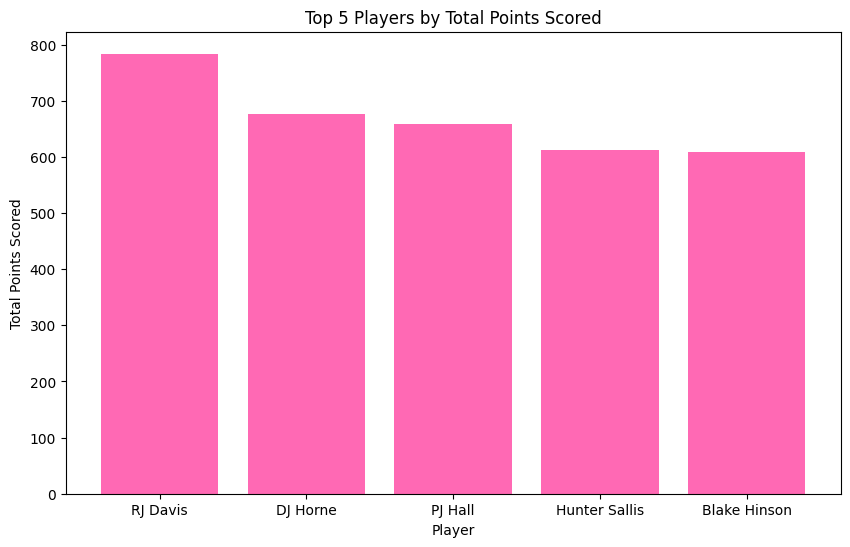

In [50]:
# 5: EC
import matplotlib.pyplot as plt

acc['PTS'] = acc['PTS'].astype(int)
PTS = acc.sort_values('PTS', ascending=False)
PTS5 = PTS.head(5)
print(PTS5[['Player', 'PTS']])

plt.figure(figsize=(10, 6))
plt.bar(PTS5['Player'], PTS5['PTS'], color='hotpink')
plt.title('Top 5 Players by Total Points Scored')
plt.xlabel('Player')
plt.ylabel('Total Points Scored')
plt.show()

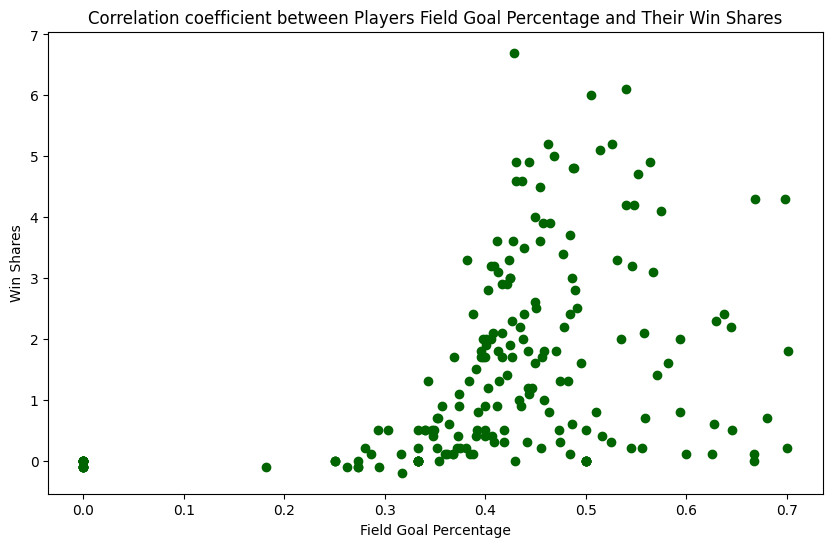

Correlation coefficient between Player's Field Goal Percentage and Their Win Shares: 0.4210663894199787


In [56]:
acc['FG%'] = pd.to_numeric(acc['FG%'], errors='coerce')
acc['WS'] = pd.to_numeric(acc['WS'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.scatter(acc['FG%'], acc['WS'], color="darkgreen")
plt.title('Correlation coefficient between Players Field Goal Percentage and Their Win Shares')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Win Shares')
plt.show()

CC = acc['FG%'].corr(acc['WS'])
print(f"Correlation coefficient between Player's Field Goal Percentage and Their Win Shares: {CC}")

What did you learn about working with CSV files and pandas DataFrames in
this assignment?

I learned that pandas DataFrames is an easy way to quickly and simply summarize
mathematical information. I don't have to add up all of these values myself, nor do I have to list out the results either. I can write a few lines of code
and pandas will find the information I want and print it out.

What was the most challenging aspect of this assignment, and how did you
overcome it?

A challenging aspect of this assignment were the column names. When I first read in the csv, the first row in the data frame contained the column names. To fix this so that I was able to evaluate the data, I used iloc and changed the start of the data to be row 1, not 0, while keeping the data from the initial row to be used as the headers.

How do you think the insights gained from analyzing ACC basketball statistics
could be applied to other real-world datasets?

These tactics could be used for environmental data sets (my major) to evaluate
the total precipitation in a year, and filter by region to determine which areas receive the highest and lowest rainfall. Other real-world datasets could include employee data at a sales job. An employer may want to see the best and worst employees by analyzing and sorting them according to their sales numbers. Graphs could be used in a team meeting to show the correlation between 2 variables, for example, the time spent on sales calls and the total amount of sales. If this relationship were positive, an employer could encourage their employees to spend more time on sales calls to reach their company sales goals. There are endless appplications of this type of data analysis for other real-world datasets.